In [3]:
# !pip install konlpy

In [4]:
# !pip install wordcloud

In [5]:
# !pip install JPype1

In [1]:
import pandas as pd
import numpy as np
import requests
from bs4 import BeautifulSoup
from newspaper import Article
import re
from konlpy.tag import Okt
from collections import Counter
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc
from wordcloud import WordCloud

In [2]:
news_list = []
kw = input('뉴스 검색어를 입력하세요...')
num = int(input('크롤링할 페이지 수를 입력하세요'))

for p in range(1, num+1):
    
    url = 'https://news.nate.com/search?q={}&page={}'.format(kw, p)
    res = requests.get(url)

    soup = BeautifulSoup(res.text, 'html.parser')
    path = '#search-option > div.search-result > ul > li'

    for li in soup.select(path):
        
        dic = {}
        
        title = li.select('h2')
        link = li.select('a')
        
        # 본문 url
        full_url = 'https:' + link[0]['href']
      
        # 본문 크롤링
        article = Article(full_url, language='ko')
        article.download()
        article.parse()
        
        dic['title'] = title[0].text
        dic['contents'] = article.text
        
        news_list.append(dic)
        
print(news_list)

뉴스 검색어를 입력하세요... 공유킥보드
크롤링할 페이지 수를 입력하세요 30


[{'title': "3조' 美 버드 몰락했는데…韓 공유 킥보드 '빅2' 흑자낸 비결은", 'contents': '\n\n’투자 혹한기’ 속 19억원 투자 유치도\n\n“직접 기기 관리해 기기 구매 비용 줄여”\n\n\n\n\n\n한때 기업가치가 3조원을 웃돌았던 미국 공유 모빌리티 업체 버드가 작년 말 파산보호를 신청했다. 코로나19 이후 매출 감소, 이용자 사고 관련 소송비 등이 원인으로 꼽힌다. 반면 비즈니스 모델이 유사한 토종 기업들은 기기 관리 비용 감축과 사업 다각화로 견고한 성장세를 이어가고 있다.\n\n\n\n지쿠(GCOO)./지쿠 제공\n\n\n\n지바이크의 지난해 영업이익은 41억원으로, 전년(82억원) 대비 절반 수준으로 떨어졌다. 지바이크 관계자는 “해외로 시장을 확장하면서 서비스 구축 비용이 많이 투입됐다”고 설명했다. 작년 7월 미국 테네시주 멤피스를 시작으로 해외 진출을 시작한 지바이크는 지난 2월 베트남에서도 서비스를 시작했다.\n\n\n\n\n\n고객도 꾸준히 늘고 있다. 데이터 플랫폼 기업 아이지에이웍스의 모바일인덱스 데이터에 따르면 지쿠의 지난달 월간활성이용자(MAU)는 67만명으로 1년 전(47만명)보다 43% 증가했다. 지쿠의 MAU는 서울시가 운영하는 공공 자전거 따릉이(58만명)보다도 많은 수준이다.\n\n\n\n’스윙’ 운영사 더스윙의 지난해 매출은 538억원으로 전년(456억원) 대비 17% 늘어난 것으로 집계됐다. 구체적으로는 PM(킥보드, 자전거, 오토바이) 서비스 부문 매출이 371억원이다. 지난해 더스윙의 영업이익은 49억원으로, 전년(17억) 대비 3배 가까이 늘어났다.\n\n\n\n더스윙은 지난해 사업 시작과 동시에 매출 100억원을 돌파한 오토바이 리스·렌탈 비즈니스 ‘스윙 바이크(SWING BIKE)’가 매출과 이익에 기여했다고 설명했다. 스윙은 최근 구독 자전거 서비스 스왑(SWAP)을 출시하는 등 사업 다각화에 힘쓰고 있다.\n\n\n\n국내 기업들의 선전은 한때 기업가치가 3조원을 돌파했던 미국 

In [3]:
news_list

[{'title': "3조' 美 버드 몰락했는데…韓 공유 킥보드 '빅2' 흑자낸 비결은",
  'contents': '\n\n’투자 혹한기’ 속 19억원 투자 유치도\n\n“직접 기기 관리해 기기 구매 비용 줄여”\n\n\n\n\n\n한때 기업가치가 3조원을 웃돌았던 미국 공유 모빌리티 업체 버드가 작년 말 파산보호를 신청했다. 코로나19 이후 매출 감소, 이용자 사고 관련 소송비 등이 원인으로 꼽힌다. 반면 비즈니스 모델이 유사한 토종 기업들은 기기 관리 비용 감축과 사업 다각화로 견고한 성장세를 이어가고 있다.\n\n\n\n지쿠(GCOO)./지쿠 제공\n\n\n\n지바이크의 지난해 영업이익은 41억원으로, 전년(82억원) 대비 절반 수준으로 떨어졌다. 지바이크 관계자는 “해외로 시장을 확장하면서 서비스 구축 비용이 많이 투입됐다”고 설명했다. 작년 7월 미국 테네시주 멤피스를 시작으로 해외 진출을 시작한 지바이크는 지난 2월 베트남에서도 서비스를 시작했다.\n\n\n\n\n\n고객도 꾸준히 늘고 있다. 데이터 플랫폼 기업 아이지에이웍스의 모바일인덱스 데이터에 따르면 지쿠의 지난달 월간활성이용자(MAU)는 67만명으로 1년 전(47만명)보다 43% 증가했다. 지쿠의 MAU는 서울시가 운영하는 공공 자전거 따릉이(58만명)보다도 많은 수준이다.\n\n\n\n’스윙’ 운영사 더스윙의 지난해 매출은 538억원으로 전년(456억원) 대비 17% 늘어난 것으로 집계됐다. 구체적으로는 PM(킥보드, 자전거, 오토바이) 서비스 부문 매출이 371억원이다. 지난해 더스윙의 영업이익은 49억원으로, 전년(17억) 대비 3배 가까이 늘어났다.\n\n\n\n더스윙은 지난해 사업 시작과 동시에 매출 100억원을 돌파한 오토바이 리스·렌탈 비즈니스 ‘스윙 바이크(SWING BIKE)’가 매출과 이익에 기여했다고 설명했다. 스윙은 최근 구독 자전거 서비스 스왑(SWAP)을 출시하는 등 사업 다각화에 힘쓰고 있다.\n\n\n\n국내 기업들의 선전은 한때 기업가치가 3조원을 돌파했던 미

In [4]:
contents = ''
for item in news_list :
    if 'contents' in item.keys() :
        contents = contents + re.sub(r'[^\w]', ' ', item['contents']) + ''

In [5]:
nlp = Okt()

In [6]:
contents_N = nlp.nouns(contents)

In [7]:
count = Counter(contents_N)
count #출력하여 내용 확인

Counter({'등': 2647,
         '보드': 2603,
         '킥': 2600,
         '공유': 1917,
         '수': 1689,
         '것': 1368,
         '서비스': 1281,
         '이용': 1111,
         '모빌리티': 1055,
         '사업': 955,
         '및': 940,
         '자전거': 928,
         '이': 888,
         '운영': 881,
         '안전': 872,
         '기술': 841,
         '고': 801,
         '위': 789,
         '재': 781,
         '사고': 765,
         '업체': 741,
         '교통': 728,
         '개인': 723,
         '장치': 707,
         '통해': 705,
         '기자': 677,
         '를': 660,
         '이동': 644,
         '더': 584,
         '위해': 568,
         '무단': 565,
         '말': 562,
         '스윙': 544,
         '주차': 526,
         '이용자': 522,
         '관련': 520,
         '지난해': 518,
         '대표': 501,
         '기업': 500,
         '금지': 500,
         '시': 489,
         '제공': 485,
         '지역': 471,
         '시장': 467,
         '바이크': 424,
         '뉴스': 417,
         '중': 402,
         '적용': 402,
         '전동': 395,
         '시민': 386

In [8]:
word_count = dict()

In [9]:
for tag, counts in count.most_common(100) :
    if(len(str(tag)) > 1 ) :
        word_count[tag] = counts
        print("%s : %s" %(tag, counts))

보드 : 2603
공유 : 1917
서비스 : 1281
이용 : 1111
모빌리티 : 1055
사업 : 955
자전거 : 928
운영 : 881
안전 : 872
기술 : 841
사고 : 765
업체 : 741
교통 : 728
개인 : 723
장치 : 707
통해 : 705
기자 : 677
이동 : 644
위해 : 568
무단 : 565
스윙 : 544
주차 : 526
이용자 : 522
관련 : 520
지난해 : 518
대표 : 501
기업 : 500
금지 : 500
제공 : 485
지역 : 471
시장 : 467
바이크 : 424
뉴스 : 417
적용 : 402
전동 : 395
시민 : 386
견인 : 385
이상 : 384
경우 : 378
배포 : 377
이번 : 377
발생 : 377
서울 : 376
대한 : 375
관리 : 374
업계 : 374
도로 : 373
국내 : 371
신고 : 359
계획 : 354
글로벌 : 349
플랫폼 : 345
지난 : 344
확대 : 343
시스템 : 341
투자 : 336
방치 : 333
수단 : 330
전기자전거 : 324
개발 : 311
올해 : 310
버스 : 305
예정 : 304
대중교통 : 300
문제 : 299
대상 : 298
마련 : 295
기반 : 294
협력 : 292
택시 : 291
지쿠 : 289
시작 : 287
주행 : 286
지원 : 284
활용 : 283
진행 : 282
내용 : 281
증가 : 275


In [10]:
word_count['킥보드']=word_count['보드']

In [11]:
del word_count['보드']

In [12]:
word_count

{'공유': 1917,
 '서비스': 1281,
 '이용': 1111,
 '모빌리티': 1055,
 '사업': 955,
 '자전거': 928,
 '운영': 881,
 '안전': 872,
 '기술': 841,
 '사고': 765,
 '업체': 741,
 '교통': 728,
 '개인': 723,
 '장치': 707,
 '통해': 705,
 '기자': 677,
 '이동': 644,
 '위해': 568,
 '무단': 565,
 '스윙': 544,
 '주차': 526,
 '이용자': 522,
 '관련': 520,
 '지난해': 518,
 '대표': 501,
 '기업': 500,
 '금지': 500,
 '제공': 485,
 '지역': 471,
 '시장': 467,
 '바이크': 424,
 '뉴스': 417,
 '적용': 402,
 '전동': 395,
 '시민': 386,
 '견인': 385,
 '이상': 384,
 '경우': 378,
 '배포': 377,
 '이번': 377,
 '발생': 377,
 '서울': 376,
 '대한': 375,
 '관리': 374,
 '업계': 374,
 '도로': 373,
 '국내': 371,
 '신고': 359,
 '계획': 354,
 '글로벌': 349,
 '플랫폼': 345,
 '지난': 344,
 '확대': 343,
 '시스템': 341,
 '투자': 336,
 '방치': 333,
 '수단': 330,
 '전기자전거': 324,
 '개발': 311,
 '올해': 310,
 '버스': 305,
 '예정': 304,
 '대중교통': 300,
 '문제': 299,
 '대상': 298,
 '마련': 295,
 '기반': 294,
 '협력': 292,
 '택시': 291,
 '지쿠': 289,
 '시작': 287,
 '주행': 286,
 '지원': 284,
 '활용': 283,
 '진행': 282,
 '내용': 281,
 '증가': 275,
 '킥보드': 2603}

In [13]:
font_path = "C:\\Windows\\Fonts\\malgun.ttf"
font_name = font_manager.FontProperties(fname = font_path).get_name()
matplotlib.rc('font', family = font_name)

In [14]:
sorted_Keys = sorted(word_count, key = word_count.get, reverse = True)
sorted_Values = sorted(word_count.values(), reverse = True)

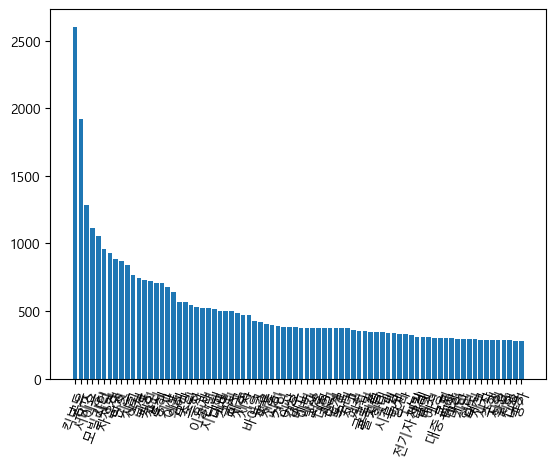

In [15]:
plt.bar(range(len(word_count)), sorted_Values, align = 'center')
plt.xticks(range(len(word_count)), list(sorted_Keys), rotation = 70)
plt.show()

In [16]:
wc = WordCloud(font_path, background_color = 'ivory', width = 800, height = 600)
cloud = wc.generate_from_frequencies(word_count)

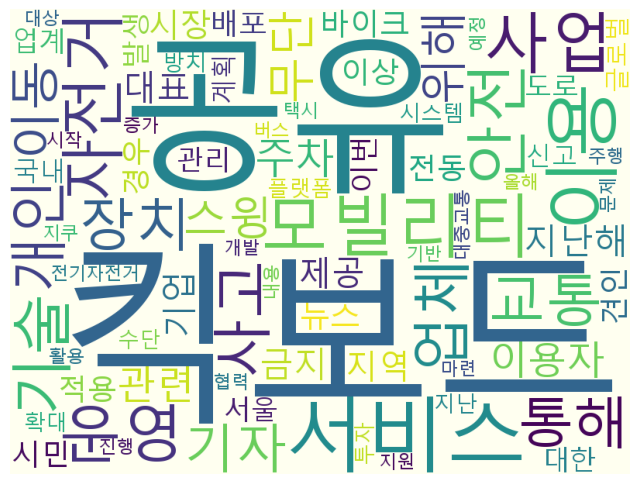

In [17]:
plt.figure(figsize = (8, 8))
plt.imshow(cloud)
plt.axis('off')
plt.show()

In [18]:
cloud.to_file('project_crawling.jpg')